In [20]:
import numpy as np
import pymc3 as pm

%pylab inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'

Populating the interactive namespace from numpy and matplotlib


In [21]:
pm.__version__

'3.10.0'

In [37]:
size = 200
true_intercept = 1
true_slope = 2

X = np.linspace(0, 1, size)
noise = np.random.normal(scale=0.5, size=size)
y = (X * true_slope + true_intercept) + noise

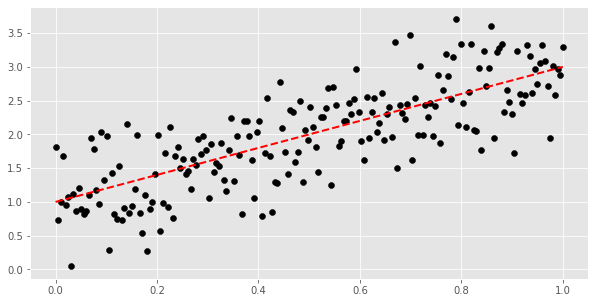

In [38]:
plt.scatter(X, y, c="black")
plt.plot(X, (X * true_slope + true_intercept), c='red')
plt.show()

In [41]:
with pm.Model() as model:
    sigma = pm.HalfCauchy("sigma", beta=10, testval=1.0)
    intercept = pm.Normal('intercept', mu=0, sigma=1)
    x_coeff = pm.Normal('X', mu=0, sigma=1)

    likelihood = pm.Normal("y", mu=x_coeff * X + intercept, sigma=sigma, observed=y)
    trace = pm.sample(3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [X, intercept, sigma]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 6 seconds.


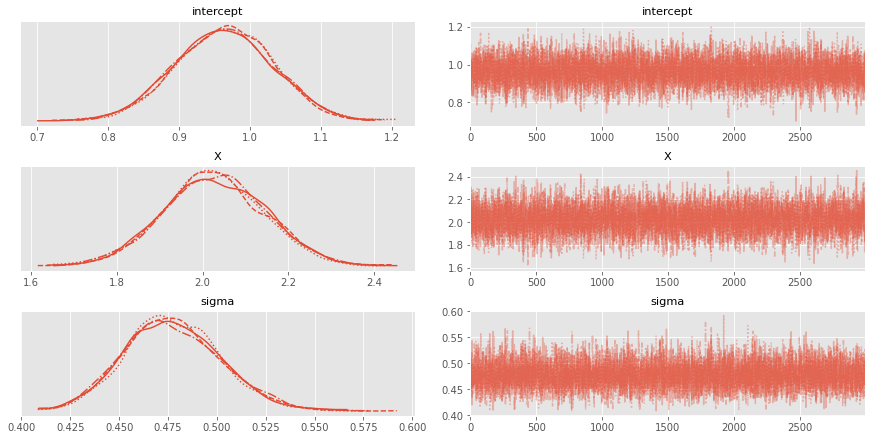

In [42]:
pm.traceplot(trace)
plt.show()

In [43]:
data = dict(x=X, y=y)

with pm.Model() as model:
    pm.glm.GLM.from_formula("y ~ x", data)
    trace = pm.sample(3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 7 seconds.
The acceptance probability does not match the target. It is 0.8846517686163864, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.880569314558518, but should be close to 0.8. Try to increase the number of tuning steps.


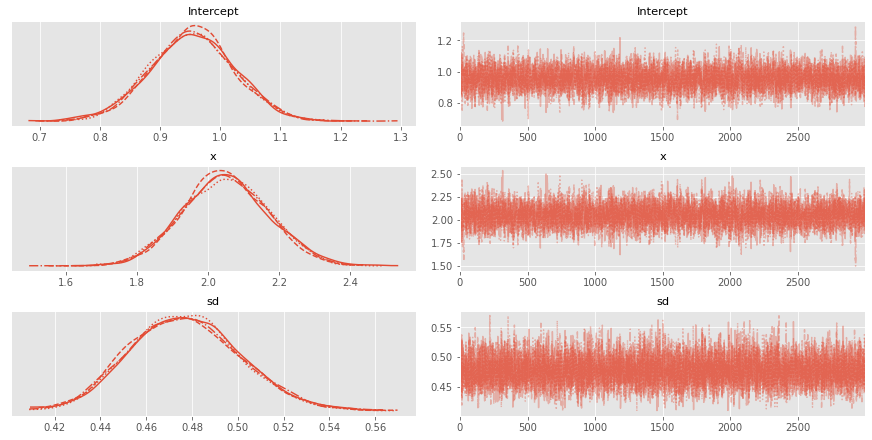

In [44]:
pm.traceplot(trace)
plt.show()

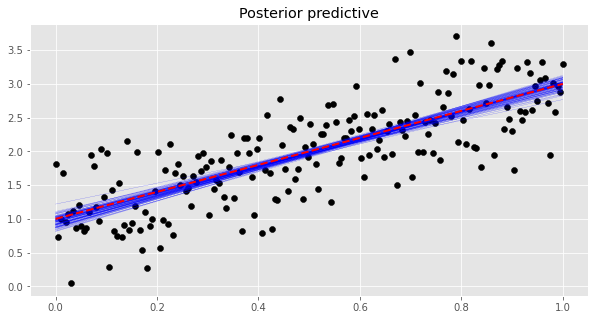

In [56]:
plt.scatter(X, y, c="black")
pm.plot_posterior_predictive_glm(trace, samples=100, label="posterior predictive regression lines", c='blue')
plt.plot(X, (X *  true_slope + true_intercept), c='red')
plt.show()

In [69]:
pm.summary(trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
Intercept  0.954  0.069   0.824    1.084      0.001    0.001    4952.0   
x          2.049  0.120   1.822    2.272      0.002    0.001    5012.0   
sd         0.477  0.024   0.434    0.523      0.000    0.000    6951.0   

           ess_sd  ess_bulk  ess_tail  r_hat  
Intercept  4952.0    4959.0    5380.0    1.0  
x          5005.0    5023.0    5280.0    1.0  
sd         6951.0    6909.0    7272.0    1.0

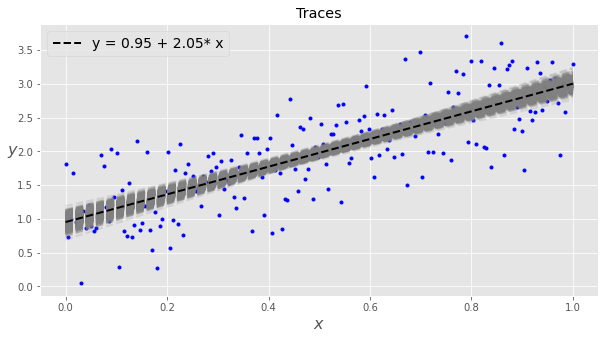

In [89]:
plt.plot(X, y, 'b.')

alpha_m = trace['Intercept'].mean()
beta_m = trace['x'].mean()

for idx in range(0, len(trace['Intercept']), 10):
    plt.plot(X, trace['Intercept'][idx] + trace['x'][idx] * X, c='gray', alpha=0.2)
plt.plot(X, alpha_m + beta_m * X, c='k', label='y = {:.2f} + {:.2f}* x'.format(alpha_m, beta_m))
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=2, fontsize=14)
plt.title("Traces")
plt.show()

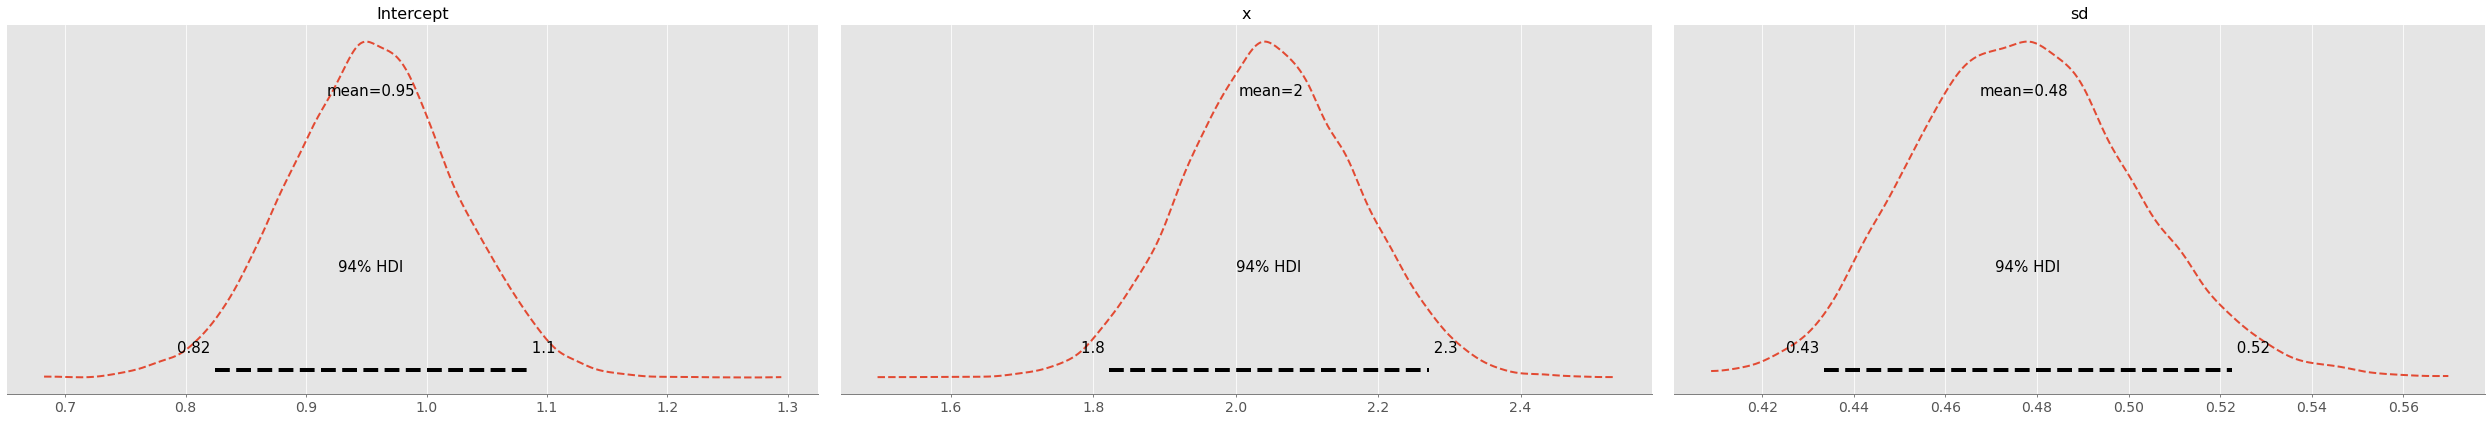

In [75]:
pm.plots.plot_posterior(trace)
plt.show()

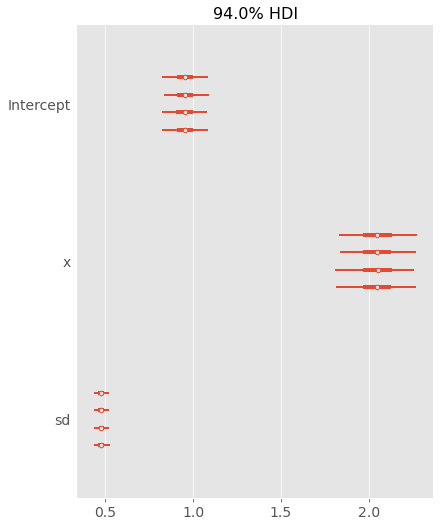

In [76]:
pm.plots.forestplot(trace)
plt.show()

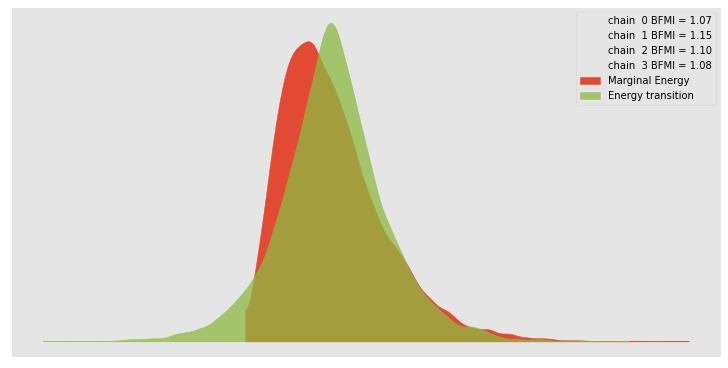

In [91]:
pm.plots.energyplot(trace)
plt.show()

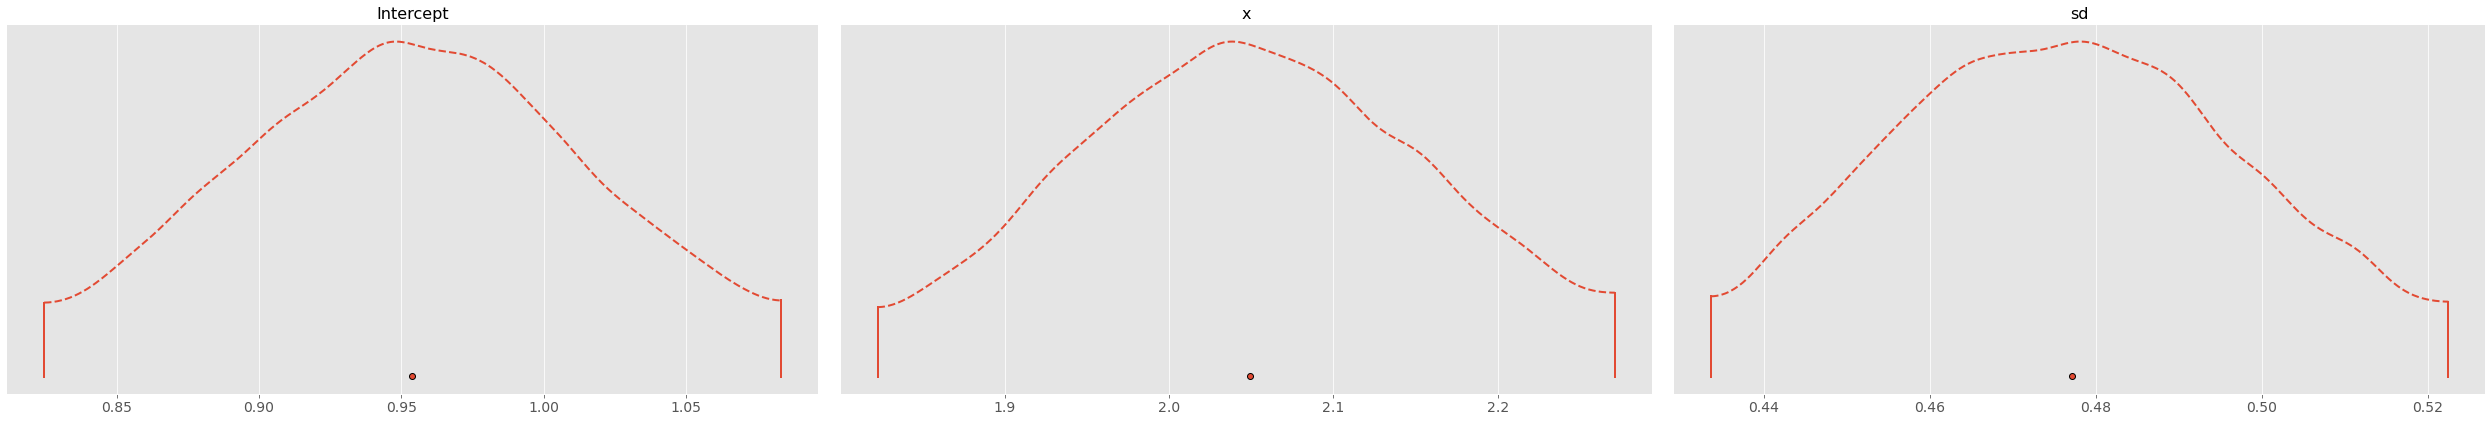

In [92]:
pm.plots.densityplot(trace)
plt.show()

In [98]:
ypred = pm.sampling.sample_posterior_predictive(model=model, trace=trace, samples=500)
y_sample_posterior_predictive = np.asarray(ypred['y'])

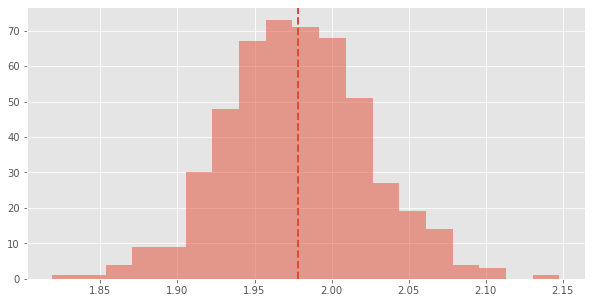

In [101]:
plt.hist([n.mean() for n in y_sample_posterior_predictive], bins=19, alpha=0.5)
plt.axvline(y.mean())
# set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency')